# Competição: *Exploring Mental Health Data*

## Descrição do Dataset: Exploring Mental Health Data
O *dataset* utilizado nesta competição é uma versão derivativa e sintética do [Depression Survey/Dataset for Analysis](https://www.kaggle.com/datasets/sumansharmadataworld/depression-surveydataset-for-analysis). Essa derivação foi realizada com o objetivo de evitar que as respostas fossem facilmente acessíveis na internet, preservando assim a privacidade dos dados originais.

### Origem dos Dados
Os dados foram gerados a partir de um modelo de aprendizado profundo que foi treinado no *dataset* original mencionado. Embora as distribuições das características no *dataset* sintético sejam semelhantes às do *dataset* original, não são idênticas. Isso significa que os dados sintéticos capturam a essência das características, mas introduzem variações para garantir a originalidade e a proteção de informações pessoais.

### Objetivo do *Dataset*
O objetivo principal que atribuí a este *dataset* é prever se um indivíduo apresenta sintomas de depressão com base em uma série de atributos. Esses atributos podem incluir, mas não estão limitados a, fatores como:

- Características Demográficas: Idade, gênero, localização (por exemplo, cidade).
- Comportamentais: Hábitos de sono, dietas, profissões.
- Saúde Mental: Indicadores de estresse, sintomas de depressão, histórico de saúde mental.

## XGBoost
A explicação abaixo se tratará de uma explicação **alto-nível** do funcionamento do modelo, e pretendo melhorá-la conforme avançar meu conhecimento técnico em ciência de dados e na implementação e funcionamento do XGBoost.

### O que é o XGBoost?
O XGBoost, ou *Extreme Gradient Boosting*, é um algoritmo de aprendizado de máquina amplamente utilizado para tarefas de **classificação** e **regressão**. Ele é uma **implementação eficiente do método de *boosting***, que **combina múltiplos modelos fracos** (geralmente árvores de decisão) para criar um modelo mais robusto e preciso. O XGBoost é famoso por sua performance superior em competições de ciência de dados e é uma escolha popular entre praticantes devido à sua eficácia e rapidez.

### Diferenciais do XGBoost

- **Performance**: O XGBoost é conhecido por sua velocidade e eficiência em comparação com outros algoritmos. Ele utiliza otimizações que aceleram o treinamento e a predição.
- **Regularização**: O algoritmo incorpora técnicas de regularização (L1 e L2) que ajudam a prevenir o overfitting, melhorando a generalização do modelo.
- **Tratamento de Dados Ausentes**: O XGBoost lida automaticamente com dados ausentes, permitindo que você não precise se preocupar em limpar completamente seus dados antes do treinamento. **Esse foi um dos principais motivos de escolha do modelo para esse *dataset***.
- **Flexibilidade**: Suporta várias funções de perda e pode ser ajustado para diferentes tipos de problemas, tornando-o altamente personalizável.

### Funcionamento do XGBoost

- **Modelo Base**: O XGBoost começa criando um modelo base fraco. Este modelo inicial é geralmente uma árvore de decisão com baixa profundidade (ex. árvore com 1 nível).

- **Iterações de *Boosting***: A cada iteração, o algoritmo **adiciona uma nova árvore ao modelo**, que **tenta corrigir os erros do modelo anterior**. Essa abordagem de "boosting" **combina as previsões de todas as árvores para melhorar a performance**. Um aspecto fundamental do *boosting* é que **cada nova árvore é construída com base nas previsões residuais das árvores anteriores**, o que significa que ela **se concentra em melhorar as previsões onde o modelo teve dificuldades**.

  **OBS**: Isso diferencia o XGBoost do modelo *Random Forests*, que adota uma abordagem de ***bagging***. No *Random Forests*, **cada árvore é treinada independentemente** em amostras aleatórias dos dados e **suas previsões são simplesmente combinadas**. Enquanto o *Random Forests* busca **reduzir a variância** ao diversificar as árvores, o *boosting*, como utilizado pelo XGBoost, visa **reduzir o erro** ao ajustar iterativamente o modelo com base nas falhas do passado.

- **Cálculo de Gradientes**: O XGBoost utiliza o conceito de gradientes para **quantificar a diferença entre as previsões do modelo e os valores reais**. Esse processo é semelhante à abordagem de otimização utilizada nas redes neurais, que frequentemente aplicam a Descida do Gradiente. No caso do XGBoost, o gradiente é **calculado a partir da função de perda**, **permitindo que o modelo ajuste os pesos das previsões**. O algoritmo se concentra em **corrigir os erros que ainda não foram abordados pelas árvores anteriores**, **priorizando as instâncias onde as previsões estão mais distantes dos valores reais**.

- **Atualização de Predições**: A nova árvore é adicionada ao modelo, e **as previsões são atualizadas**. Esse processo é **repetido várias vezes**, cada vez ajustando o modelo em direção às previsões corretas.

- **Regularização**: Durante o treinamento, o XGBoost aplica penalidades (regularização L1 e L2) para manter o modelo simples e evitar que ele se ajuste demais aos dados de treinamento (*overfitting*).

- **Predição Final**: Ao final do processo de treinamento, o XGBoost combina as previsões de todas as árvores criadas para fazer a predição final. Isso resulta em um **modelo forte**, capaz de fazer previsões mais precisas em dados desconhecidos.

#### Operações Internas
- **Divisão de Dados**: O XGBoost usa algoritmos eficientes para dividir os dados em nós, escolhendo as melhores divisões para maximizar a **pureza** dos nós filhos (característica advinda das **Árvores de Decisão**, que **usam a Impureza de Gini** ou a **entropia** para tentar maximizar a **homogeniedade dos dados**).
- **Cálculo de Importância**: Durante o processo, o modelo avalia quais atributos são mais importantes para a predição, ajudando na interpretação do modelo.

**Documentação**: [XGBoost: Introduction to Boosted Trees](https://xgboost.readthedocs.io/en/latest/tutorials/model.html).

**Recomendação de vídeo sobre o assunto [PT/BR]**: [Classificação e regressão com XGBoost](https://www.youtube.com/watch?v=hVOuCfJxprI&ab_channel=Let%27sData)

In [1]:
import kagglehub
kagglehub.login()

## Vamos aos dados...
Dito isso, vamos trabalhar com os dados do *dataset*, utilizando para isso a linguagem de programação Python, e várias bibliotecas adjascentes a ela.

### Importando bibliotecas e dados...
Para essa tarefa, usaremos bibliotecas como o pandas, numpy, scikit-learn, etc. Portanto, faremos a importação dessas todas logo de início. Faço isso por preferência pessoal, visto que poderia importá-las conforme necessário nas células a seguir.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import os

In [3]:
playground_series_s4e11_path = kagglehub.competition_download('playground-series-s4e11')

train = pd.read_csv(playground_series_s4e11_path + "/train.csv")
test = pd.read_csv(playground_series_s4e11_path + "/test.csv")

train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


## Análise simples dos dados

Pretendo, abaixo, entender informações simples sobre os dados. Como:
- Quantidade de valores nulos (`NaN`) nas *features*
- Tipos de valores que iremos encontrar em cada uma das *features*
- Visualização, em forma de gráfico, das variáveis numéricas

In [4]:
# Quantidade de NaNs

null_counts = train.isnull().sum()
print(null_counts)

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64


In [5]:
# Tipos das features

print(train.dtypes)

id                                         int64
Name                                      object
Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object


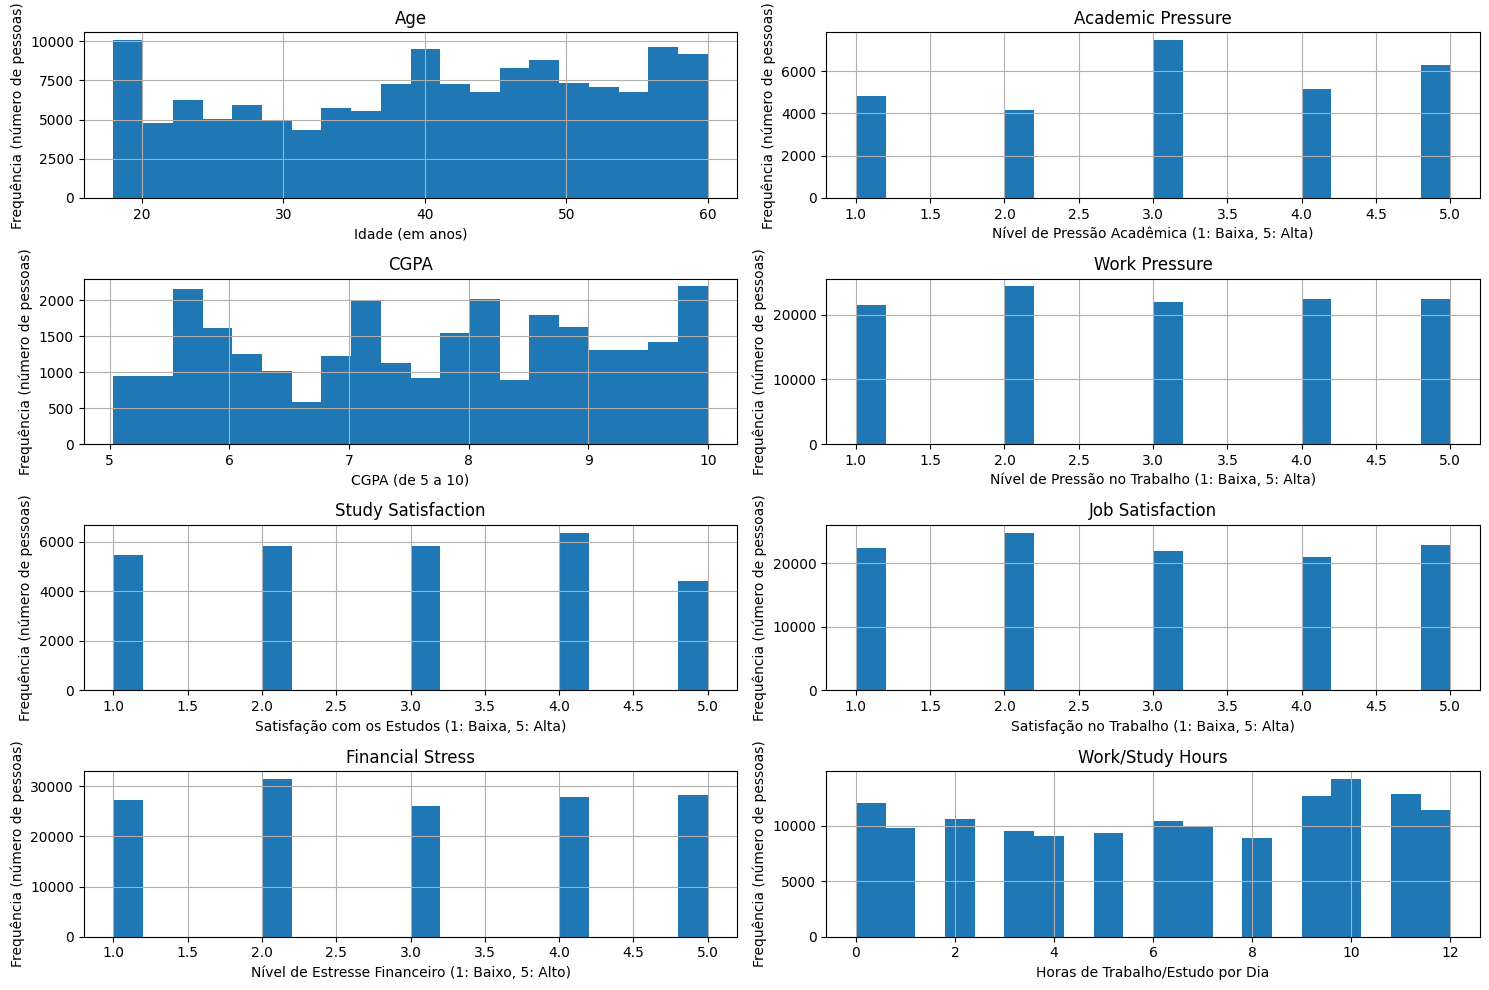

In [6]:
# Exibição das variáveis numéricas gráficamente

numeric_columns = ['Age', 'Academic Pressure', 'CGPA', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction', 'Financial Stress', 'Work/Study Hours']

fig, axes = plt.subplots(4, 2, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    train[column].hist(bins=20, ax=axes[i])
    axes[i].set_title(column)
    if column == 'Age':
        axes[i].set_xlabel('Idade (em anos)')
        axes[i].set_ylabel('Frequência (número de pessoas)')
    elif column == 'Academic Pressure':
        axes[i].set_xlabel('Nível de Pressão Acadêmica (1: Baixa, 5: Alta)')
        axes[i].set_ylabel('Frequência (número de pessoas)')
    elif column == 'CGPA':
        axes[i].set_xlabel('CGPA (de 5 a 10)')
        axes[i].set_ylabel('Frequência (número de pessoas)')
    elif column == 'Work Pressure':
        axes[i].set_xlabel('Nível de Pressão no Trabalho (1: Baixa, 5: Alta)')
        axes[i].set_ylabel('Frequência (número de pessoas)')
    elif column == 'Study Satisfaction':
        axes[i].set_xlabel('Satisfação com os Estudos (1: Baixa, 5: Alta)')
        axes[i].set_ylabel('Frequência (número de pessoas)')
    elif column == 'Job Satisfaction':
        axes[i].set_xlabel('Satisfação no Trabalho (1: Baixa, 5: Alta)')
        axes[i].set_ylabel('Frequência (número de pessoas)')
    elif column == 'Financial Stress':
        axes[i].set_xlabel('Nível de Estresse Financeiro (1: Baixo, 5: Alto)')
        axes[i].set_ylabel('Frequência (número de pessoas)')
    elif column == 'Work/Study Hours':
        axes[i].set_xlabel('Horas de Trabalho/Estudo por Dia')
        axes[i].set_ylabel('Frequência (número de pessoas)')

plt.tight_layout()
plt.show()


### Pré-processamento dos dados
Agora começaremos o processo de limpeza e entendimento dos dados. Para essa tarefa, pretendo alcançar os seguintes objetivos:

- Identificar variáveis (features) desnecessárias e/ou redundantes e retirá-las do dataset (exemplo: "id" e "Name", retornaremos o "id" apenas para a submissão final dos resultados ao Kaggle)
- Manipular o dataset conforme meu objetivo final, que será classificar binariamente um indivíduo como depressivo, ou não, com base nos atributos disponíveis
- Codificação de variáveis categóricas, tentando manter a integridade das colunas em ambos os *dataframes* (`test` e `train`) adicionando as colunas únicas de cada um deles em sua dupla
- Facilitar a aprendizagem do modelo, identificando se um indíviduo tem ou não determinadas valores com a criação de uma coluna booleana descrevendo a presença/ausência desses para cada classe ("Student" e "Working Professional")

Durante essa etapa (e as posteriores), marcaremos alguns valores ausentes com o valor -1, a fim de informar ao modelo durante o seu treinamento que esses são valores "não aplicáveis".

In [7]:
# Tirando colunas desnecessárias

train.drop(columns=['id', 'Name'], inplace=True)
test.drop(columns=['id', 'Name'], inplace=True)

train.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [8]:
# Criando nova categoria na coluna "Profession" para estudantes, visto que eles não tem profissão

train['Profession'] = train['Profession'].fillna('No Profession')

test['Profession'] = test['Profession'].fillna('No Profession')

train.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Male,33.0,Visakhapatnam,Student,No Profession,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [9]:
# One-hot encoding das variáveis categóricas

train = pd.get_dummies(train, columns=['City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree'], drop_first=True)
test = pd.get_dummies(test, columns=['City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree'], drop_first=True)

# Após a codificação, as colunas do conjunto de treinamento e do conjunto de teste podem não coincidir, estamos corrigindo isso agora!

all_columns = set(train.columns).union(set(test.columns))
train = train.reindex(columns=all_columns, fill_value=-1)
test = test.reindex(columns=all_columns, fill_value=-1)

train.head()

,Sleep Duration_2-3 hours,Dietary Habits_Healthy,Degree_B B.Tech,City_Jhanvi,Profession_Electrician,Dietary Habits_Vivaan,Profession_Analyst,City_Hrithik,Degree_Mihir,Dietary Habits_Class 12,...,Degree_LLEd,Degree_M.Tech,City_Aishwarya,Profession_LLM,Profession_Pilot,Dietary Habits_BSc,City_Raghavendra,Degree_BHM,Degree_Brithika,Dietary Habits_Naina
0,False,True,-1,False,False,-1,False,-1,False,False,...,False,False,False,False,False,False,False,True,False,-1
1,False,False,-1,False,False,-1,False,-1,False,False,...,False,False,False,False,False,False,False,False,False,-1
2,False,True,-1,False,False,-1,False,-1,False,False,...,False,False,False,False,False,False,False,False,False,-1
3,False,False,-1,False,False,-1,False,-1,False,False,...,False,False,False,False,False,False,False,False,False,-1
4,False,False,-1,False,False,-1,False,-1,False,False,...,False,False,False,False,False,False,False,False,False,-1


In [10]:
# Codificação booleana de variáveis binárias (como gênero, que, no contexto do dataset, só pode ser masculino ou feminino)

train['Has Work Pressure'] = train['Working Professional or Student'].apply(lambda x: 0 if x == 'Student' else 1)
test['Has Work Pressure'] = test['Working Professional or Student'].apply(lambda x: 0 if x == 'Student' else 1)

train['Has Study Satisfaction'] = train['Working Professional or Student'].apply(lambda x: 1 if x == 'Student' else 0)
test['Has Study Satisfaction'] = test['Working Professional or Student'].apply(lambda x: 1 if x == 'Student' else 0)

train['Has Job Satisfaction'] = train['Working Professional or Student'].apply(lambda x: 1 if x == 'Student' else 0)
test['Has Job Satisfaction'] = test['Working Professional or Student'].apply(lambda x: 1 if x == 'Student' else 0)

train['Working Professional or Student'] = train['Working Professional or Student'].map({'Working Professional': 1, 'Student': 0})
test['Working Professional or Student'] = test['Working Professional or Student'].map({'Working Professional': 1, 'Student': 0})

train['Family History of Mental Illness'] = train['Family History of Mental Illness'].map({'Yes': 1, 'No': 0})
test['Family History of Mental Illness'] = test['Family History of Mental Illness'].map({'Yes': 1, 'No': 0})

train['Have you ever had suicidal thoughts ?'] = train['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})
test['Have you ever had suicidal thoughts ?'] = test['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})

train['Gender'] = train['Gender'].map({'Male': 1, 'Female': 0})
test['Gender'] = test['Gender'].map({'Male': 1, 'Female': 0})

train['Working Professional or Student'] = train['Working Professional or Student'].astype(int)
test['Working Professional or Student'] = test['Working Professional or Student'].astype(int)

train['Gender'] = train['Gender'].astype(int)
test['Gender'] = test['Gender'].astype(int)

train['Have you ever had suicidal thoughts ?'] = train['Have you ever had suicidal thoughts ?'].astype(int)
test['Have you ever had suicidal thoughts ?'] = test['Have you ever had suicidal thoughts ?'].astype(int)

train['Family History of Mental Illness'] = train['Family History of Mental Illness'].astype(int)
test['Family History of Mental Illness'] = test['Family History of Mental Illness'].astype(int)

train.fillna(-1, inplace=True)  # Usando -1 como "não aplicável"
test.fillna(-1, inplace=True)  # Usando -1 como "não aplicável"

train.head()

,Sleep Duration_2-3 hours,Dietary Habits_Healthy,Degree_B B.Tech,City_Jhanvi,Profession_Electrician,Dietary Habits_Vivaan,Profession_Analyst,City_Hrithik,Degree_Mihir,Dietary Habits_Class 12,...,Profession_LLM,Profession_Pilot,Dietary Habits_BSc,City_Raghavendra,Degree_BHM,Degree_Brithika,Dietary Habits_Naina,Has Work Pressure,Has Study Satisfaction,Has Job Satisfaction
0,False,True,-1,False,False,-1,False,-1,False,False,...,False,False,False,False,True,False,-1,1,0,0
1,False,False,-1,False,False,-1,False,-1,False,False,...,False,False,False,False,False,False,-1,1,0,0
2,False,True,-1,False,False,-1,False,-1,False,False,...,False,False,False,False,False,False,-1,0,1,1
3,False,False,-1,False,False,-1,False,-1,False,False,...,False,False,False,False,False,False,-1,1,0,0
4,False,False,-1,False,False,-1,False,-1,False,False,...,False,False,False,False,False,False,-1,1,0,0


In [11]:
# Escalonamento MinMax de variáveis numéricas

scaler = MinMaxScaler()

cols_to_scale = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours']

scaler = MinMaxScaler()

# Utilizando o scaler apenas em dados válidos (que não são NaN)
train[cols_to_scale] = scaler.fit_transform(train[cols_to_scale].replace(-1, np.nan))  # Substituindo -1 por NaN para escalonar corretamente
test[cols_to_scale] = scaler.transform(test[cols_to_scale].replace(-1, np.nan))  # Aplicando a transformação no conjunto de teste

train.head()

,Sleep Duration_2-3 hours,Dietary Habits_Healthy,Degree_B B.Tech,City_Jhanvi,Profession_Electrician,Dietary Habits_Vivaan,Profession_Analyst,City_Hrithik,Degree_Mihir,Dietary Habits_Class 12,...,Profession_LLM,Profession_Pilot,Dietary Habits_BSc,City_Raghavendra,Degree_BHM,Degree_Brithika,Dietary Habits_Naina,Has Work Pressure,Has Study Satisfaction,Has Job Satisfaction
0,False,True,-1,False,False,-1,False,-1,False,False,...,False,False,False,False,True,False,-1,1,0,0
1,False,False,-1,False,False,-1,False,-1,False,False,...,False,False,False,False,False,False,-1,1,0,0
2,False,True,-1,False,False,-1,False,-1,False,False,...,False,False,False,False,False,False,-1,0,1,1
3,False,False,-1,False,False,-1,False,-1,False,False,...,False,False,False,False,False,False,-1,1,0,0
4,False,False,-1,False,False,-1,False,-1,False,False,...,False,False,False,False,False,False,-1,1,0,0


## Configuração e execução do modelo preditivo

Agora vamos, enfim, utilizar os dados já organizados para o treinamento do nosso modelo. Nesse sentido, usaremos a técnica *random search* para que o modelo possa, a partir de um conjunto de valores pré-definidos para certos hiperparâmetros, descobrir qual é o melhor conjunto dentre eles.

Note que estamos usando o `n_jobs=-1`, pois quero paralelizar essa operação. Caso seu computador não seja potente o suficiente, retire esse argumento da função de *search*. No meu caso, graças ao Google Colab, posso fazer uso desse recurso.

### Hiperparâmetros Utilizados
Na configuração do modelo `XGBClassifier`, ajustamos vários hiperparâmetros que influenciam o desempenho do modelo.

- `learning_rate`: Este hiperparâmetro **controla a taxa de aprendizado do modelo**. Um **valor menor faz com que*o modelo aprenda mais lentamente**, mas pode resultar em um melhor ajuste final, pois permite que mais árvores sejam adicionadas antes que as previsões se estabilizem. Os valores testados foram 0.01 e 0.1.

- `n_estimators`: Refere-se ao **número total de árvores que o modelo usará**. Um **número maior pode levar a um melhor desempenho, mas também aumenta o risco de *overfitting***, especialmente se o conjunto de dados for pequeno. Neste caso, testamos 100 e 200 árvores.

- `max_depth`: Este hiperparâmetro define a **profundidade máxima de cada árvore** (ou seja, distância do último nó até a raiz). Árvores mais profundas podem modelar relações mais complexas, mas também são mais propensas a *overfitting*. Os valores testados foram 3 e 6.

- `min_child_weight`: Este hiperparâmetro se refere à **soma mínima dos pesos das instâncias em um nó filho**. Em outras palavras, ele determina o **número mínimo de observações** (ou a **soma dos pesos**, se os dados estiverem ponderados) **que devem estar presentes em um nó antes que o algoritmo considere a possibilidade de fazer uma nova divisão**. A importância deste hiperparâmetro está relacionada ao controle do *overfitting*. **Se o valor de `min_child_weight` for muito baixo, o modelo pode criar divisões em nós que têm apenas um número muito pequeno de instâncias, resultando em árvores muito profundas e específicas** (que **não generalizam bem os dados**).

- `subsample`: Este hiperparâmetro controla a **fração de amostras a serem usadas para treinar cada árvore**. Usar um valor menor pode ajudar a prevenir *overfitting*. Testamos 0.8 e 1.0 (ou seja, todas as amostras).

- `colsample_bytree`: Controla a **fração de colunas a serem amostradas para cada árvore**. Neste caso, testamos apenas 0.8, indicando que **80% das características serão consideradas ao construir cada árvore**.

- `gamma`: Este hiperparâmetro regula a **complexidade da árvore**, funcionando como um **termo de penalização**. **Se definido como 0, significa que não há penalização, e se for maior que 0, a árvore só será dividida se o ganho for maior que `gamma`**. Testamos 0 e 1 para ver seu impacto no desempenho do modelo.

In [12]:
# Separação de características e rótulos
X = train.drop('Depression', axis=1)
y = train['Depression']

# Divisão dos dados
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Definindo o modelo
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', missing=-1)

# Hiperparâmetros a serem ajustados
param_dist = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'min_child_weight': [1, 3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8],
    'gamma': [0, 1]
}

# Usando RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=10, scoring='accuracy', cv=3, verbose=2, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:30:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8],
                                        'gamma': [0, 1],
                                        'learning_rate': [0.01, 0.1],
                                        'max_depth': [3, 6],
                                        'min_child_weight': [1, 3],
                                        'n_estimators': [100, 200],
                                        'subsample': [0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=2)

## Avaliação do modelo

Para o avaliarmos, entenderemos seu desempenho de predição no conjunto de treino e sua acurácia na etapa de validação cruzada.

In [13]:
# Criando uma nova variável que irá guardar o melhor modelo encontrado, além de estarmos imprimindo seus hiperparâmetros na tela

# Exemplo -> Melhores hiperparâmetros: {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.8}

best_model = random_search.best_estimator_
print(f'Melhores hiperparâmetros: {random_search.best_params_}')

Melhores hiperparâmetros: {'subsample': 1.0, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}


In [14]:
# Predição usando o conjunto de validação (conjunto de treino)

y_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Acurácia no conjunto de validação: {accuracy:.5f}')

Acurácia no conjunto de validação: 0.93842


In [15]:
# Validação cruzada final, a fim de avaliar a generalização do melhor modelo uma última vez

final_scores = cross_val_score(best_model, X, y, cv=3)
print(f'Acurácia da Validação Cruzada Final: {final_scores.mean():.5f} ± {final_scores.std():.5f}')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:30:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:30:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:30:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Acurácia da Validação Cruzada Final: 0.93886 ± 0.00052


## Envio da previsão final

Abaixo, está o teste final do nosso modelo, usando o CSV apropriado (armazenado em forma de *dataframe* em `test`). Após esse teste, faremos o download do CSV "gabarito". Meu envio ao Kaggle resultou em uma pontuação de 0.94237, que é aproximadamente 94% de acerto.

In [16]:
# Fazer previsões no conjunto de teste

test = test.drop(columns=['Depression'])
predictions = random_search.best_estimator_.predict(test)

In [17]:
# Submissão final do CSV de predição ao Kaggle

test_original = pd.read_csv(playground_series_s4e11_path + "/test.csv")
test_ids = test_original[['id']]

# Criar um DataFrame para a submissão com os ids
submission = pd.DataFrame({
    'id': test_ids['id'],  # Usando a coluna 'id' original
    'Depression': predictions
})

# Salvar o arquivo de submissão
submission.to_csv('submission.csv', index=False)

### Melhorias possíveis

Gostaria de visualizar a importância de determinados atributos para diferentes classes, como "Student" e "Working Professional". Ao "plotar" essa importância em forma de gráfico, poderíamos entender mais claramente como cada característica impacta as previsões do nosso modelo em classes específicas específicas. Isso é crucial, pois a análise geral da importância das *features* pode não refletir as nuances e as contribuições reais de cada atributo para classes distintas, visto que, um "Student", por exemplo, não deveria denotar importância nenhuma à *feature* "Job Satisfaction".

Além disso, futuramente, quero melhorar a documentação desse notebook, adicionando exemplos ilustrados e simples para tentar facilitar o entendimento quanto ao funcionamento do modelo XGBoost. Ainda sou um estudante, e tenho muito a melhorar e aprender, e darei o meu melhor para avançar técnicamente e compartilhar esse avanço com outros estudantes e/ou profissionais da área. Portanto, peço que caso haja alguma contribuição que você gostaria de fazer, envie um *pull request* no GitHub, ou faça um comentário em meu post no Kaggle, seria algo extremamente positivo para a comunidade de ciência de dados.

Se houver algum material de estudo sobre Árvores de Decisão, XGBoost, ou algum outro modelo que poderia performar bem nesse *dataset*, por favor, me envie! Vou fazer o possível para continuar enriquecendo esse material durante meus estudos.

Agradeço caso tenha acompanhado o notebook até aqui!